In [7]:
import torch
import sys; sys.path.append('../')
from src.utils.numerics import dct1d, idct1d

from math import sqrt

import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [8]:
N = 1000
b = 4096
var_x = .9
x = sqrt(var_x) * torch.randn(b, N)

In [9]:
X = dct1d(x, norm='ortho')
xh = idct1d(X, norm='ortho')

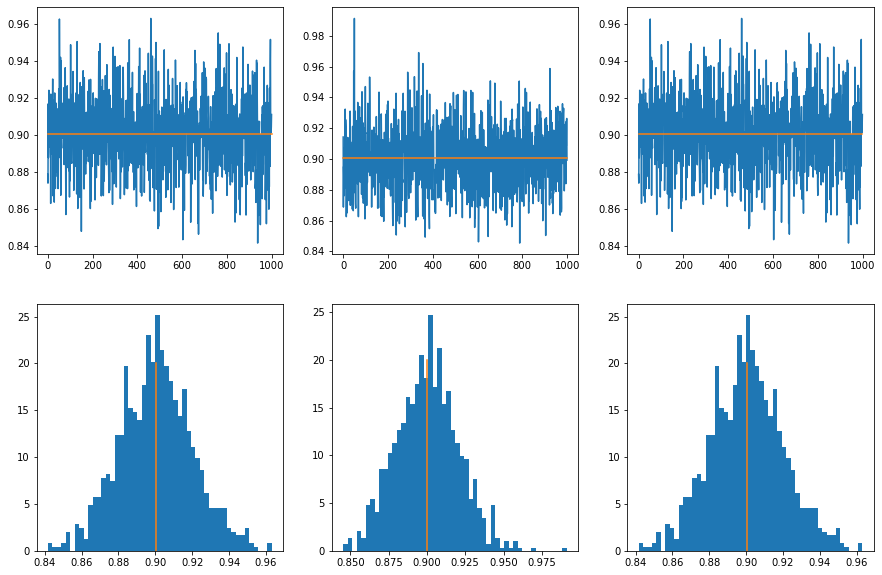

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
#
axs[0,0].plot(x.detach().var(0));
axs[0,0].plot([0,N-1], [x.var(0).mean(0), x.var(0).mean(0)]);
axs[1,0].hist(x.detach().var(0)[None], bins=50, density=True);
axs[1,0].plot([x.detach().var(0).mean(0), x.detach().var(0).mean(0)],[0, 20]);
#
axs[0,1].plot(X.detach().var(0));
axs[0,1].plot([0,N-1], [X.var(0).mean(0), X.var(0).mean(0)]);
axs[1,1].hist(X.detach().var(0)[None], bins=50, density=True);
axs[1,1].plot([X.detach().var(0).mean(0), X.detach().var(0).mean(0)],[0, 20]);
#
axs[0,2].plot(xh.detach().var(0));
axs[0,2].plot([0,N-1], [xh.var(0).mean(0), xh.var(0).mean(0)]);
axs[1,2].hist(xh.detach().var(0)[None], bins=50, density=True);
axs[1,2].plot([xh.detach().var(0).mean(0), xh.detach().var(0).mean(0)],[0, 20]);



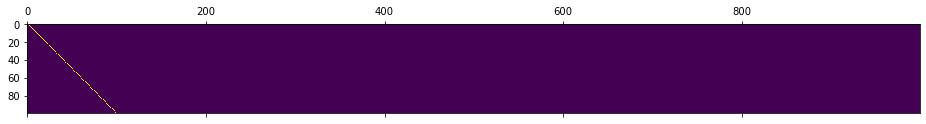

In [11]:
m = 100
Sm = torch.cat([torch.eye(m, m), torch.zeros(m, N-m)], -1)
plt.matshow(Sm.cpu())

### Identity weight (effect of order reduction / pruning)

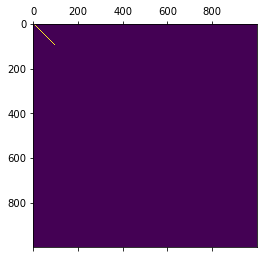

In [12]:
A = torch.eye(m)
M = torch.einsum('ij,jk,kl->il', Sm.T, A, Sm)
plt.matshow(M)

In [13]:
Xh = torch.einsum('ij,bj->bi', M, X)
xh = idct1d(Xh, norm='ortho')

Text(0.5, 1.0, '$V[\\hat{x}_n]$')

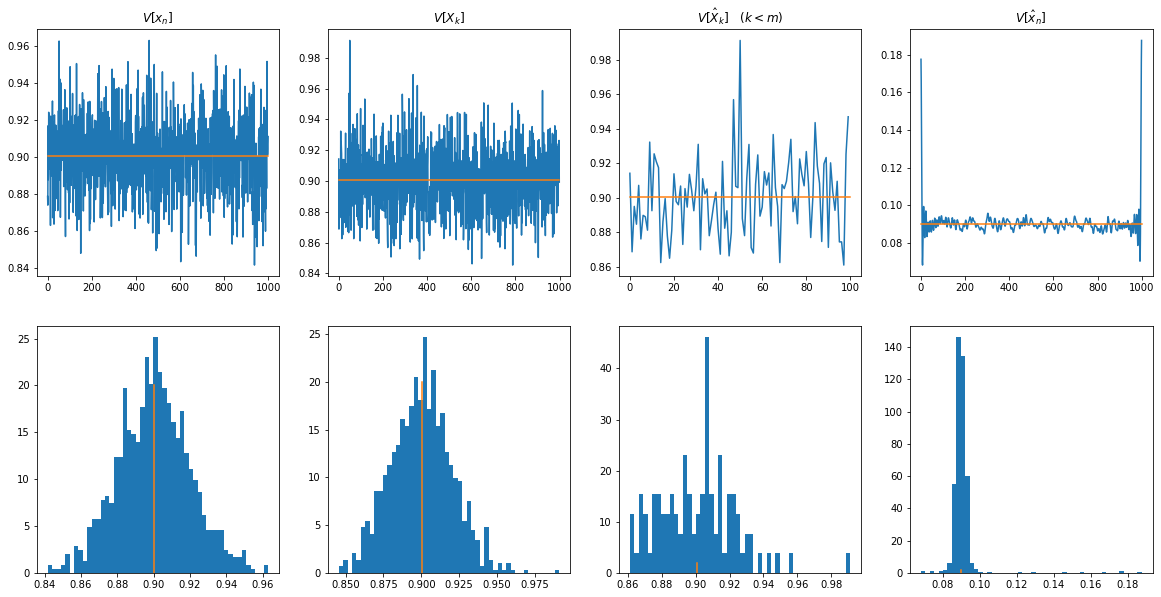

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
#
axs[0,0].plot(x.detach().var(0));
axs[0,0].plot([0,N-1], [x.var(0).mean(0), x.var(0).mean(0)]);
axs[1,0].hist(x.detach().var(0)[None], bins=50, density=True);
axs[1,0].plot([x.detach().var(0).mean(0), x.detach().var(0).mean(0)],[0, 20]);
axs[0,0].set_title('$V[x_n]$')
#
axs[0,1].plot(X.detach().var(0));
axs[0,1].plot([0,N-1], [X.var(0).mean(0), X.var(0).mean(0)]);
axs[1,1].hist(X.detach().var(0)[None], bins=50, density=True);
axs[1,1].plot([X.detach().var(0).mean(0), X.detach().var(0).mean(0)],[0, 20]);
axs[0,1].set_title('$V[X_k]$')
#
axs[0,2].plot(Xh[:,:m].detach().var(0));
axs[0,2].plot([0,m], [Xh[:,:m].var(0).mean(0), Xh[:,:m].var(0).mean(0)]);
axs[1,2].hist(Xh[:,:m].detach().var(0)[None], bins=50, density=True);
axs[1,2].plot([Xh[:,:m].detach().var(0)[:m].mean(0), Xh[:,:m].detach().var(0).mean(0)],[0, 2]);
axs[0,2].set_title('$V[\\hat{X}_k]\quad (k<m)$')
#
axs[0,3].plot(xh.detach().var(0));
axs[0,3].plot([0,N-1], [xh.var(0).mean(0), xh.var(0).mean(0)]);
axs[1,3].hist(xh.detach().var(0)[None], bins=50, density=True);
axs[1,3].plot([xh.detach().var(0).mean(0), xh.detach().var(0).mean(0)],[0, 2]);
axs[0,3].set_title('$V[\hat{x}_n]$')

### Normal weights $\sigma_A=1$

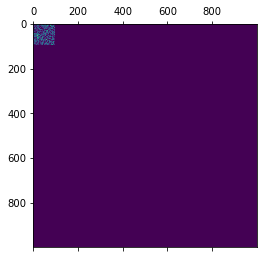

In [15]:
A = torch.torch.randn(m,m)
M = torch.einsum('ij,jk,kl->il', Sm.T, A, Sm)
plt.matshow(M.abs())

In [16]:
Xh = torch.einsum('ij,bj->bi', M, X)
xh = idct1d(Xh, norm='ortho')

Text(0.5, 1.0, '$V[\\hat{x}_n]$')

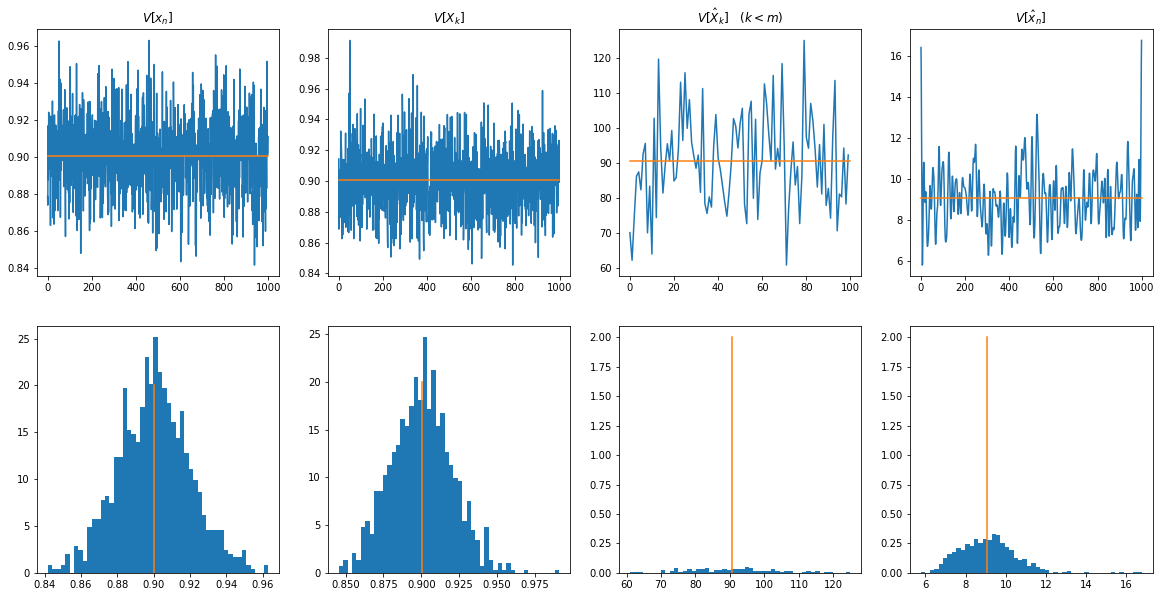

In [17]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
#
axs[0,0].plot(x.detach().var(0));
axs[0,0].plot([0,N-1], [x.var(0).mean(0), x.var(0).mean(0)]);
axs[1,0].hist(x.detach().var(0)[None], bins=50, density=True);
axs[1,0].plot([x.detach().var(0).mean(0), x.detach().var(0).mean(0)],[0, 20]);
axs[0,0].set_title('$V[x_n]$')
#
axs[0,1].plot(X.detach().var(0));
axs[0,1].plot([0,N-1], [X.var(0).mean(0), X.var(0).mean(0)]);
axs[1,1].hist(X.detach().var(0)[None], bins=50, density=True);
axs[1,1].plot([X.detach().var(0).mean(0), X.detach().var(0).mean(0)],[0, 20]);
axs[0,1].set_title('$V[X_k]$')
#
axs[0,2].plot(Xh[:,:m].detach().var(0));
axs[0,2].plot([0,m], [Xh[:,:m].var(0).mean(0), Xh[:,:m].var(0).mean(0)]);
axs[1,2].hist(Xh[:,:m].detach().var(0)[None], bins=50, density=True);
axs[1,2].plot([Xh[:,:m].detach().var(0)[:m].mean(0), Xh[:,:m].detach().var(0).mean(0)],[0, 2]);
axs[0,2].set_title('$V[\\hat{X}_k]\quad (k<m)$')
#
axs[0,3].plot(xh.detach().var(0));
axs[0,3].plot([0,N-1], [xh.var(0).mean(0), xh.var(0).mean(0)]);
axs[1,3].hist(xh.detach().var(0)[None], bins=50, density=True);
axs[1,3].plot([xh.detach().var(0).mean(0), xh.detach().var(0).mean(0)],[0, 2]);
axs[0,3].set_title('$V[\hat{x}_n]$')

### Normal weight VP on first `m` modes (effect of order reduction / pruning)

For $k<m$ and all $n$
$$
    \begin{aligned}
        \mathbb{V}[\hat X_k] &= m\sigma^2 \sigma_A^2\\
                             &=  m\sigma_A^2 \mathbb{V}[X_k] \\
                             &=  m\sigma_A^2 \mathbb{V}[x_n] 
    \end{aligned}
$$

Thus 

$$
    \mathbb{V}[\hat X_k] = \mathbb{V}[ X_k]~~\Leftrightarrow~~\sigma_A^2 = \frac{1}{m}
$$

(only for the first $m$ modes tho!)

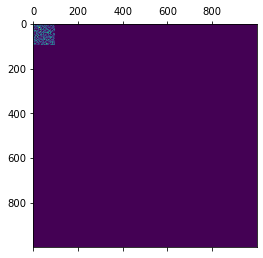

In [19]:
A = torch.randn(m, m) / sqrt(m)
M = torch.einsum('ij,jk,kl->il', Sm.T, A, Sm)
plt.matshow(M.abs())

In [20]:
Xh = torch.einsum('ij,bj->bi', M, X)
xh = idct1d(Xh, norm='ortho')

Text(0.5, 1.0, '$V[\\hat{x}_n]$')

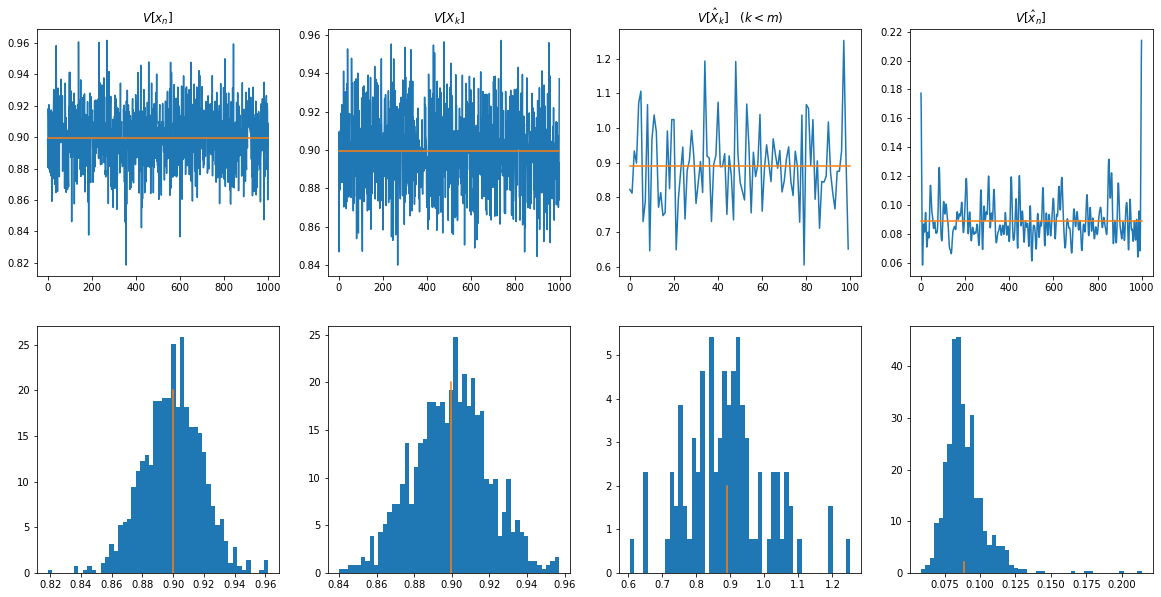

In [21]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
#
axs[0,0].plot(x.detach().var(0));
axs[0,0].plot([0,N-1], [x.var(0).mean(0), x.var(0).mean(0)]);
axs[1,0].hist(x.detach().var(0)[None], bins=50, density=True);
axs[1,0].plot([x.detach().var(0).mean(0), x.detach().var(0).mean(0)],[0, 20]);
axs[0,0].set_title('$V[x_n]$')
#
axs[0,1].plot(X.detach().var(0));
axs[0,1].plot([0,N-1], [X.var(0).mean(0), X.var(0).mean(0)]);
axs[1,1].hist(X.detach().var(0)[None], bins=50, density=True);
axs[1,1].plot([X.detach().var(0).mean(0), X.detach().var(0).mean(0)],[0, 20]);
axs[0,1].set_title('$V[X_k]$')
#
axs[0,2].plot(Xh[:,:m].detach().var(0));
axs[0,2].plot([0,m], [Xh[:,:m].var(0).mean(0), Xh[:,:m].var(0).mean(0)]);
axs[1,2].hist(Xh[:,:m].detach().var(0)[None], bins=50, density=True);
axs[1,2].plot([Xh[:,:m].detach().var(0)[:m].mean(0), Xh[:,:m].detach().var(0).mean(0)],[0, 2]);
axs[0,2].set_title('$V[\\hat{X}_k]\quad (k<m)$')
#
axs[0,3].plot(xh.detach().var(0));
axs[0,3].plot([0,N-1], [xh.var(0).mean(0), xh.var(0).mean(0)]);
axs[1,3].hist(xh.detach().var(0)[None], bins=50, density=True);
axs[1,3].plot([xh.detach().var(0).mean(0), xh.detach().var(0).mean(0)],[0, 2]);
axs[0,3].set_title('$V[\hat{x}_n]$')

### Normal weight VP init
**Lemma 1** `[Propagation of Uncertainty under DFT/DCT]`

Let $X = Wx$ with $x, X\in\mathbb R^N$ and $W\in\mathbb C^{N\times N}$. Then
$$
    \Sigma_X = W \Sigma_x W^*
$$

*proof*
$$
    \begin{aligned}
        \Sigma_X &= \mathbb E\left[ (Wx - \mathbb{E}[Wx])\wedge (Wx - \mathbb{E}[Wx])\right]\\
                 &= \mathbb E\left[ W(x - \mathbb{E}[x])\wedge W(x - \mathbb{E}[x])\right]\\
                 &= \mathbb E\left[ W(x - \mathbb{E}[x])(x - \mathbb{E}[x])^\top W^*\right]\\
                 &= W\mathbb E\left[ W(x - \mathbb{E}[x])(x - \mathbb{E}[x])^\top \right]W^*\\
                 &= W \Sigma_x W^*
    \end{aligned}
$$
$\triangle$
#

**Lemma 2** `[Propagation of total Variance under DFT/DCT]`

Let $X = Wx$ with $x, X\in\mathbb R^N$ and $W\in\mathbb C^{N\times N}$. Then
$$
    \mathbb V[X] = \mathbb{V}[x]
$$
###
*proof*


Recalling that the total variance of a random variable is equal to the trace of its covariance matrix, i.e. 
#
$$
    \mathbb{V}[x] = \text{tr}(\Sigma_x),\quad\mathbb{V}[X] = \text{tr}(\Sigma_X)
$$
#
then 
$$
    \begin{aligned}
                        & \mathbb V[X] = \mathbb{V}[x]\\
        \Leftrightarrow \quad & \text{tr}(\Sigma_x) =  \text{tr}(\Sigma_X)
    \end{aligned}
$$

Recalling **Lemma 1** yields

$$
    \begin{aligned}
                              & \mathbb V[X] = \mathbb{V}[x]\\
        \Leftrightarrow \quad & \text{tr}(\Sigma_x) =  \text{tr}(W\Sigma_x W^*)\\
        \Leftrightarrow \quad & \text{tr}(\Sigma_x) -  \text{tr}(W\Sigma_x W^*) = 0\\
        \Leftrightarrow \quad & \text{tr}(\Sigma_x) -  \text{tr}(\Sigma_x W^*W) = 0\\
        %\Leftrightarrow \quad & \sum_{n}[\Sigma_x]_{nn} -  \sum_{n,k,j}[W]_{nk}[\Sigma_x]_{kj}[W^*]_{jn} = 0\\
        %\Leftrightarrow \quad & \sum_{n}[\Sigma_x]_{nn} -  \sum_{n}[\Sigma_x]_{nn}[W]_{nk}[\Sigma_x]_{kj}[W^*]_{jn} = 0
    \end{aligned}
$$

Since the DCT/DFT matrix is orthonormal, i.e. $W^* = W^{-1}$ we have that 

$$
    \text{tr}(\Sigma_x W^*W) = \text{tr}(\Sigma_x),
$$

proving the result.

$\triangle$


For $k<m$ and all $n$
$$
    \begin{aligned}
        \mathbb{V}[\hat X_k] &= m\sigma^2 \sigma_A^2\\
                             &=  m\sigma_A^2 \mathbb{V}[X_k] \\
                             &=  m\sigma_A^2 \mathbb{V}[x_n] 
    \end{aligned}
$$

However for $k\geq m$

$$
    \begin{aligned}
        \mathbb{V}[\hat X_k] = 0
    \end{aligned}
$$

and thus the total variance of the transformed spectrum is 

$$
     \begin{aligned}
         \mathbb{V}[\hat X] &= \text{tr}(\text{Cov}(\hat X))\\
                            &= \sum_{k=0}^{N-1} \mathbb{V}[\hat X_k]\\
                            &= \sum_{k=0}^{m} \mathbb{V}[\hat X_k] + \sum_{k=m}^{N-1} 0.\\
                            &= \sum_{k=0}^{m} \mathbb{V}[\hat X_k]
     \end{aligned}
$$

Since under DCT/DFT transforms the variance has to be preserved, i.e. $\text{tr}(\text{Cov}(x)) = \text{tr}(\text{Cov}(X))$ we have that 
$$
    \begin{aligned}
                        & \mathbb{V}[\hat x] =  \mathbb{V}[x]\\
        \Leftrightarrow\quad& \sum_{n=0}^{N-1} \mathbb{V}[\hat x_n] = \sum_{n=0}^{N-1} \mathbb{V}[x_n]\\
        \Leftrightarrow\quad& \sum_{k=0}^{N-1} \mathbb{V}[\hat X_k] = \sum_{k=0}^{N-1} \mathbb{V}[X_k]\\
        \Leftrightarrow\quad& \sum_{k=0}^{m} m\sigma^2\sigma^2_A = \sum_{k=0}^{N-1} \sigma^2\\
        \Leftrightarrow\quad& m^2\sigma^2\sigma^2_A =  N \sigma^2\\
        \Leftrightarrow\quad& \sigma^2_A =  \frac{N}{m^2}

     \end{aligned}
$$



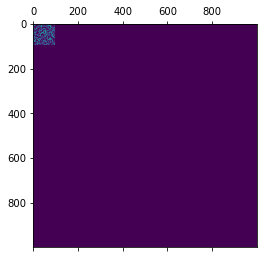

In [22]:
A = (sqrt(N)/ m) * torch.randn(m, m)
M = torch.einsum('ij,jk,kl->il', Sm.T, A, Sm)
plt.matshow(M.abs())

In [23]:
Xh = torch.einsum('ij,bj->bi', M, X)
xh = idct1d(Xh, norm='ortho')

Text(0.5, 1.0, '$V[\\hat{x}_n]$')

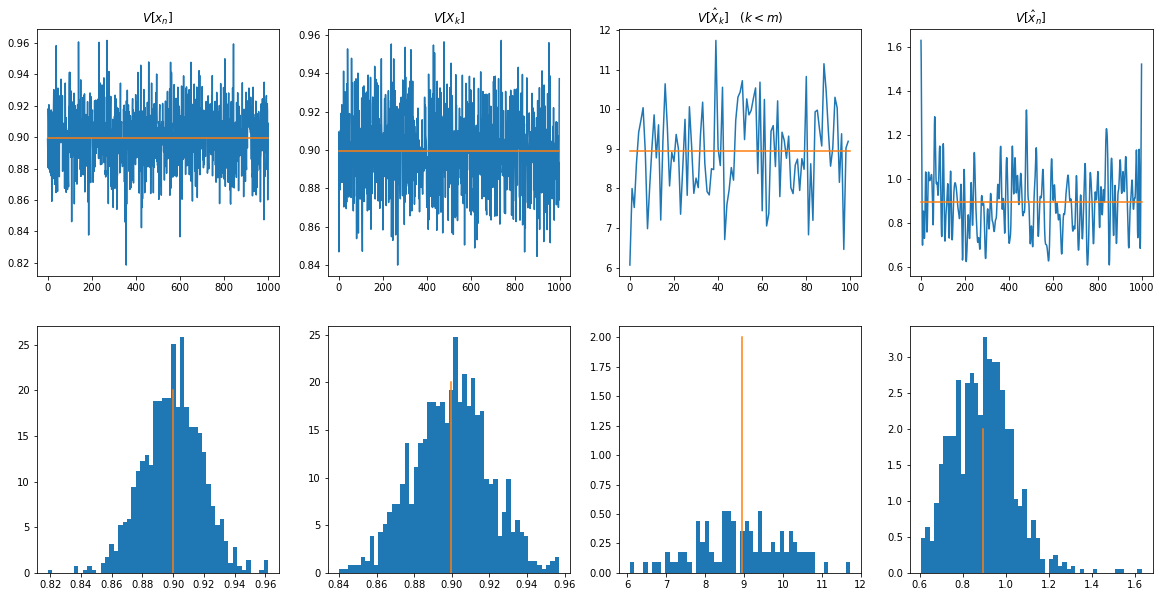

In [24]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
#
axs[0,0].plot(x.detach().var(0));
axs[0,0].plot([0,N-1], [x.var(0).mean(0), x.var(0).mean(0)]);
axs[1,0].hist(x.detach().var(0)[None], bins=50, density=True);
axs[1,0].plot([x.detach().var(0).mean(0), x.detach().var(0).mean(0)],[0, 20]);
axs[0,0].set_title('$V[x_n]$')
#
axs[0,1].plot(X.detach().var(0));
axs[0,1].plot([0,N-1], [X.var(0).mean(0), X.var(0).mean(0)]);
axs[1,1].hist(X.detach().var(0)[None], bins=50, density=True);
axs[1,1].plot([X.detach().var(0).mean(0), X.detach().var(0).mean(0)],[0, 20]);
axs[0,1].set_title('$V[X_k]$')
#
axs[0,2].plot(Xh[:,:m].detach().var(0));
axs[0,2].plot([0,m], [Xh[:,:m].var(0).mean(0), Xh[:,:m].var(0).mean(0)]);
axs[1,2].hist(Xh[:,:m].detach().var(0)[None], bins=50, density=True);
axs[1,2].plot([Xh[:,:m].detach().var(0)[:m].mean(0), Xh[:,:m].detach().var(0).mean(0)],[0, 2]);
axs[0,2].set_title('$V[\\hat{X}_k]\quad (k<m)$')
#
axs[0,3].plot(xh.detach().var(0));
axs[0,3].plot([0,N-1], [xh.var(0).mean(0), xh.var(0).mean(0)]);
axs[1,3].hist(xh.detach().var(0)[None], bins=50, density=True);
axs[1,3].plot([xh.detach().var(0).mean(0), xh.detach().var(0).mean(0)],[0, 2]);
axs[0,3].set_title('$V[\hat{x}_n]$')

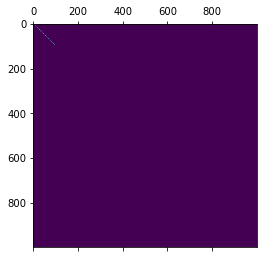

In [24]:
#A = (sqrt(N)/ m) * torch.randn(m, m)

A = torch.diag_embed(sqrt(N / m) * torch.randn(m))
M = torch.einsum('ij,jk,kl->il', Sm.T, A, Sm)
plt.matshow(M.abs())

In [25]:
Xh = torch.einsum('ij,bj->bi', M, X)
xh = idct1d(Xh, norm='ortho')

In [33]:
import torch.nn as nn
layer = nn.Conv1d(40, 5, 3)
nn.init._calculate_fan_in_and_fan_out(layer.weight)

(120, 15)

Init signature:
nn.Conv1d(
    in_channels: int,
    out_channels: int,
    kernel_size: Union[int, Tuple[int]],
    stride: Union[int, Tuple[int]] = 1,
    padding: Union[str, int, Tuple[int]] = 0,
    dilation: Union[int, Tuple[int]] = 1,
    groups: int = 1,
    bias: bool = True,
    padding_mode: str = 'zeros',
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies a 1D convolution over an input signal composed of several input
planes.

In the simplest case, the output value of the layer with input size
:math:`(N, C_{\text{in}}, L)` and output :math:`(N, C_{\text{out}}, L_{\text{out}})` can be
precisely described as:

.. math::
    \text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) +
    \sum_{k = 0}^{C_{in} - 1} \text{weight}(C_{\text{out}_j}, k)
    \star \text{input}(N_i, k)

where :math:`\star` is the valid `cross-correlation`_ operator,
:math:`N` is a batch size, :math:`C` denotes a number of channels,
:math:`L` is a length of signal sequence.


Thi

Text(0.5, 1.0, '$V[\\hat{x}_n]$')

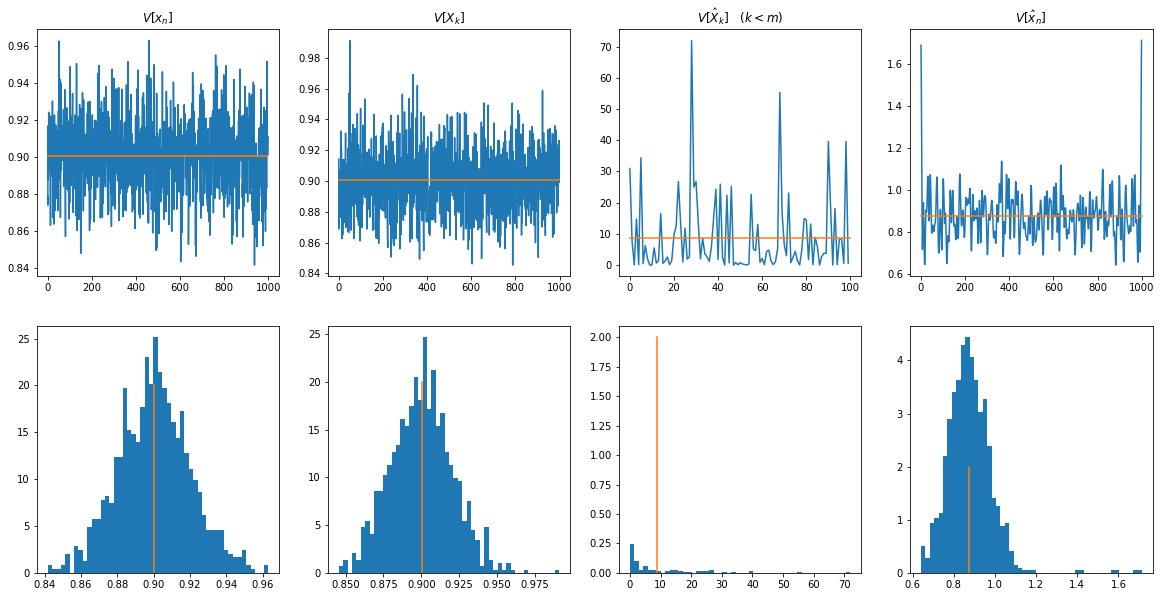

In [26]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
#
axs[0,0].plot(x.detach().var(0));
axs[0,0].plot([0,N-1], [x.var(0).mean(0), x.var(0).mean(0)]);
axs[1,0].hist(x.detach().var(0)[None], bins=50, density=True);
axs[1,0].plot([x.detach().var(0).mean(0), x.detach().var(0).mean(0)],[0, 20]);
axs[0,0].set_title('$V[x_n]$')
#
axs[0,1].plot(X.detach().var(0));
axs[0,1].plot([0,N-1], [X.var(0).mean(0), X.var(0).mean(0)]);
axs[1,1].hist(X.detach().var(0)[None], bins=50, density=True);
axs[1,1].plot([X.detach().var(0).mean(0), X.detach().var(0).mean(0)],[0, 20]);
axs[0,1].set_title('$V[X_k]$')
#
axs[0,2].plot(Xh[:,:m].detach().var(0));
axs[0,2].plot([0,m], [Xh[:,:m].var(0).mean(0), Xh[:,:m].var(0).mean(0)]);
axs[1,2].hist(Xh[:,:m].detach().var(0)[None], bins=50, density=True);
axs[1,2].plot([Xh[:,:m].detach().var(0)[:m].mean(0), Xh[:,:m].detach().var(0).mean(0)],[0, 2]);
axs[0,2].set_title('$V[\\hat{X}_k]\quad (k<m)$')
#
axs[0,3].plot(xh.detach().var(0));
axs[0,3].plot([0,N-1], [xh.var(0).mean(0), xh.var(0).mean(0)]);
axs[1,3].hist(xh.detach().var(0)[None], bins=50, density=True);
axs[1,3].plot([xh.detach().var(0).mean(0), xh.detach().var(0).mean(0)],[0, 2]);
axs[0,3].set_title('$V[\hat{x}_n]$')

In [ ]:
Xh = torch.einsum('ij,bj->bi', M, X)
xh = idct1d(Xh, norm='ortho')

Text(0.5, 1.0, '$V[\\hat{x}_n]$')

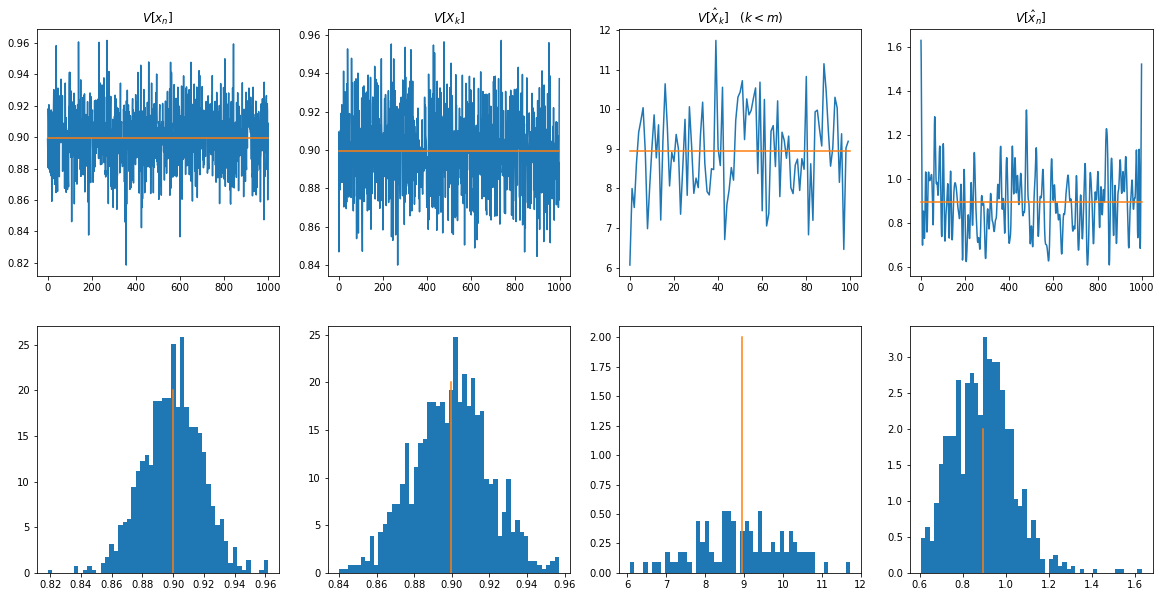

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
#
axs[0,0].plot(x.detach().var(0));
axs[0,0].plot([0,N-1], [x.var(0).mean(0), x.var(0).mean(0)]);
axs[1,0].hist(x.detach().var(0)[None], bins=50, density=True);
axs[1,0].plot([x.detach().var(0).mean(0), x.detach().var(0).mean(0)],[0, 20]);
axs[0,0].set_title('$V[x_n]$')
#
axs[0,1].plot(X.detach().var(0));
axs[0,1].plot([0,N-1], [X.var(0).mean(0), X.var(0).mean(0)]);
axs[1,1].hist(X.detach().var(0)[None], bins=50, density=True);
axs[1,1].plot([X.detach().var(0).mean(0), X.detach().var(0).mean(0)],[0, 20]);
axs[0,1].set_title('$V[X_k]$')
#
axs[0,2].plot(Xh[:,:m].detach().var(0));
axs[0,2].plot([0,m], [Xh[:,:m].var(0).mean(0), Xh[:,:m].var(0).mean(0)]);
axs[1,2].hist(Xh[:,:m].detach().var(0)[None], bins=50, density=True);
axs[1,2].plot([Xh[:,:m].detach().var(0)[:m].mean(0), Xh[:,:m].detach().var(0).mean(0)],[0, 2]);
axs[0,2].set_title('$V[\\hat{X}_k]\quad (k<m)$')
#
axs[0,3].plot(xh.detach().var(0));
axs[0,3].plot([0,N-1], [xh.var(0).mean(0), xh.var(0).mean(0)]);
axs[1,3].hist(xh.detach().var(0)[None], bins=50, density=True);
axs[1,3].plot([xh.detach().var(0).mean(0), xh.detach().var(0).mean(0)],[0, 2]);
axs[0,3].set_title('$V[\hat{x}_n]$')